# RA model using the whole CV

In [26]:
#Import libraries
import tensorflow as tf
#import tensorflowjs as tfjs
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Activation, Dense, LeakyReLU
from sklearn.model_selection import KFold

In [27]:
dataset = pd.ExcelFile('FSCAV_data_reduced.xlsx')
sheets = dataset.sheet_names # I need to have sheet names
dataset = pd.read_excel('FSCAV_data_reduced.xlsx', sheet_name = None, header = None) # extract data

ds = dataset[sheets[0]] #initialize DataSet
for i in range(1,len(sheets)-1):  #the last one is the 'Labels' one
    ds = pd.concat([ds, dataset[sheets[i]]],1)
CVs = np.transpose(ds.values)
labels = np.array(dataset[sheets[len(sheets)-1]].values[:,2])

In [28]:
dataset = np.zeros((len(labels), CVs.shape[1] + 1)) 
dataset[:,0:CVs.shape[1]] = CVs
dataset [:, CVs.shape[1]] = labels
dataset = pd.DataFrame(dataset)
dataset.info

<bound method DataFrame.info of           0         1         2         3         4         5         6     \
0    -0.025085 -0.039029 -0.053656 -0.068966 -0.084956 -0.101622 -0.118956   
1     0.071069  0.059592  0.047400  0.034494  0.020872  0.006537 -0.008509   
2     0.020276  0.006714 -0.007598 -0.022659 -0.038470 -0.055028 -0.072329   
3    -0.099964 -0.119903 -0.140668 -0.162254 -0.184653 -0.207855 -0.231848   
4     0.130477  0.120605  0.109956  0.098523  0.086300  0.073286  0.059477   
...        ...       ...       ...       ...       ...       ...       ...   
6500  1.108723  1.145779  1.183372  1.221514  1.260220  1.299503  1.339384   
6501  1.078367  1.115986  1.154234  1.193124  1.232672  1.272896  1.313814   
6502  1.030445  1.065830  1.101828  1.138456  1.175731  1.213675  1.252308   
6503  1.036428  1.071921  1.108024  1.144754  1.182130  1.220172  1.258903   
6504  0.986311  1.020215  1.054780  1.090027  1.125980  1.162665  1.200111   

          7         8         9

In [29]:
#Separate train and test, 80% and 20%. 
train_dataset = dataset.sample(frac=0.80, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [30]:
#Separate labels from input
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop(1100)
test_labels = test_features.pop(1100)

In [31]:
#Normalise the input, which could be of different orders of magnitude. 
normalizer = preprocessing.Normalization(input_shape=[1100,])
normalizer.adapt(np.array(train_features))

In [32]:
#Define the model. Important: it needs to be the same structure as in tensorflow.js 
    
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(1100, activation='selu'),  
        layers.Dense(750, activation='selu'),
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001), metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

In [33]:
#Define a function to plot the loss per epoch 
def plot_loss(history):
    plt.figure()
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Concentration]')
    plt.legend()
    plt.grid(True)
    plt.figure()
    plt.plot(history.history['root_mean_squared_error'], label="rmse")
    plt.plot(history.history['root_mean_squared_error'], label="rmse")
    plt.xlabel('Epoch')
    plt.ylabel('RMSE [Concentration]')

In [34]:
##Define a function to plot the prediction 
def plot_prediction(x, y):
    plt.scatter(train_features['Charge'], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('Charge')
    plt.ylabel('Concentration')
    plt.legend()

RMSE: 
3.986925318072132
RMSE: 
6.293410906157803
RMSE: 
29.420214644087245
RMSE: 
3.5135191507474235
RMSE: 
4.3543519234106345


<Figure size 432x288 with 0 Axes>

RuntimeError: latex was not able to process the following string:
b'val_loss'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (MiKTeX 21.6)
entering extended mode
(C:/Users/sergi/.matplotlib/tex.cache/8fc9afbf51ea12768ec7e0856aa76c90.tex
LaTeX2e <2021-06-01>
L3 programming layer <2021-06-01>
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2021/02/12 v1.4n Standard LaTeX document class
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/psnfss\helvet.sty
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/graphics\keyval.sty))
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.cfg)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/base\textcomp.sty)
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/l3backend\l3backend-dvi
ps.def) (8fc9afbf51ea12768ec7e0856aa76c90.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/psnfss\ot1phv.fd)
! Missing $ inserted.
<inserted text> 
                $
l.19 {\sffamily val_
                    loss}
No pages of output.
Transcript written on 8fc9afbf51ea12768ec7e0856aa76c90.log.
latex: major issue: So far, you have not checked for MiKTeX updates.




<Figure size 432x288 with 1 Axes>

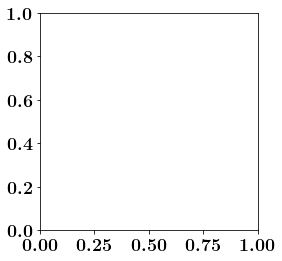

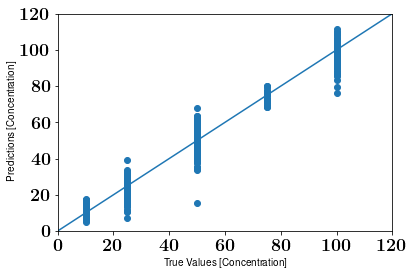

<Figure size 432x288 with 0 Axes>

RuntimeError: latex was not able to process the following string:
b'val_loss'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (MiKTeX 21.6)
entering extended mode
(C:/Users/sergi/.matplotlib/tex.cache/8fc9afbf51ea12768ec7e0856aa76c90.tex
LaTeX2e <2021-06-01>
L3 programming layer <2021-06-01>
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2021/02/12 v1.4n Standard LaTeX document class
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/psnfss\helvet.sty
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/graphics\keyval.sty))
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.cfg)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/base\textcomp.sty)
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/l3backend\l3backend-dvi
ps.def) (8fc9afbf51ea12768ec7e0856aa76c90.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/psnfss\ot1phv.fd)
! Missing $ inserted.
<inserted text> 
                $
l.19 {\sffamily val_
                    loss}
No pages of output.
Transcript written on 8fc9afbf51ea12768ec7e0856aa76c90.log.
latex: major issue: So far, you have not checked for MiKTeX updates.




<Figure size 432x288 with 1 Axes>

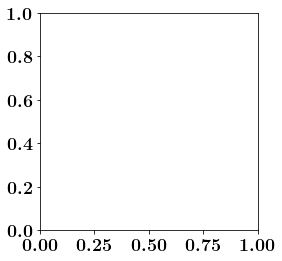

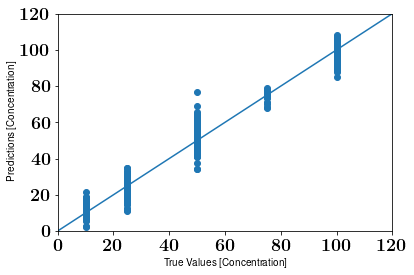

<Figure size 432x288 with 0 Axes>

RuntimeError: latex was not able to process the following string:
b'val_loss'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (MiKTeX 21.6)
entering extended mode
(C:/Users/sergi/.matplotlib/tex.cache/8fc9afbf51ea12768ec7e0856aa76c90.tex
LaTeX2e <2021-06-01>
L3 programming layer <2021-06-01>
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2021/02/12 v1.4n Standard LaTeX document class
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/psnfss\helvet.sty
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/graphics\keyval.sty))
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.cfg)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/base\textcomp.sty)
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/l3backend\l3backend-dvi
ps.def) (8fc9afbf51ea12768ec7e0856aa76c90.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/psnfss\ot1phv.fd)
! Missing $ inserted.
<inserted text> 
                $
l.19 {\sffamily val_
                    loss}
No pages of output.
Transcript written on 8fc9afbf51ea12768ec7e0856aa76c90.log.
latex: major issue: So far, you have not checked for MiKTeX updates.




<Figure size 432x288 with 1 Axes>

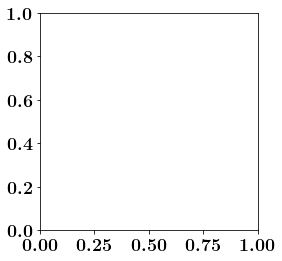

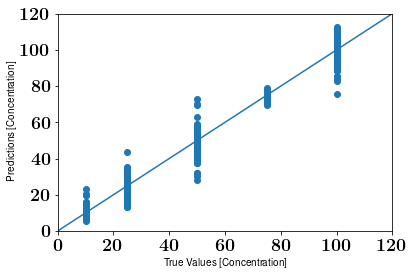

<Figure size 432x288 with 0 Axes>

RuntimeError: latex was not able to process the following string:
b'val_loss'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (MiKTeX 21.6)
entering extended mode
(C:/Users/sergi/.matplotlib/tex.cache/8fc9afbf51ea12768ec7e0856aa76c90.tex
LaTeX2e <2021-06-01>
L3 programming layer <2021-06-01>
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2021/02/12 v1.4n Standard LaTeX document class
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/psnfss\helvet.sty
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/graphics\keyval.sty))
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.cfg)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/base\textcomp.sty)
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/l3backend\l3backend-dvi
ps.def) (8fc9afbf51ea12768ec7e0856aa76c90.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/psnfss\ot1phv.fd)
! Missing $ inserted.
<inserted text> 
                $
l.19 {\sffamily val_
                    loss}
No pages of output.
Transcript written on 8fc9afbf51ea12768ec7e0856aa76c90.log.
latex: major issue: So far, you have not checked for MiKTeX updates.




<Figure size 432x288 with 1 Axes>

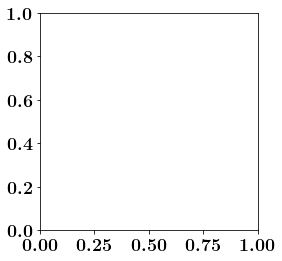

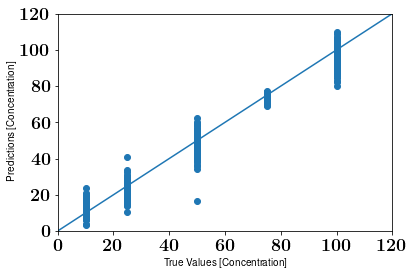

<Figure size 432x288 with 0 Axes>

RuntimeError: latex was not able to process the following string:
b'val_loss'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (MiKTeX 21.6)
entering extended mode
(C:/Users/sergi/.matplotlib/tex.cache/8fc9afbf51ea12768ec7e0856aa76c90.tex
LaTeX2e <2021-06-01>
L3 programming layer <2021-06-01>
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2021/02/12 v1.4n Standard LaTeX document class
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/psnfss\helvet.sty
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/graphics\keyval.sty))
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.cfg)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/base\textcomp.sty)
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/l3backend\l3backend-dvi
ps.def) (8fc9afbf51ea12768ec7e0856aa76c90.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
(C:\Users\sergi\AppData\Local\Programs\MiKTeX\tex/latex/psnfss\ot1phv.fd)
! Missing $ inserted.
<inserted text> 
                $
l.19 {\sffamily val_
                    loss}
No pages of output.
Transcript written on 8fc9afbf51ea12768ec7e0856aa76c90.log.
latex: major issue: So far, you have not checked for MiKTeX updates.




<Figure size 432x288 with 1 Axes>

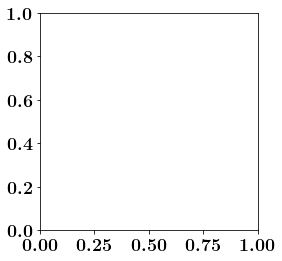

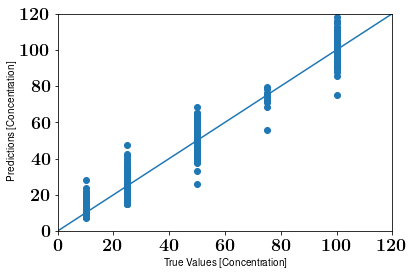

In [35]:
# Merge inputs and targets
inputs = np.concatenate((train_features, test_features), axis=0)
targets = np.concatenate((train_labels,test_labels), axis=0)
# Define the K-fold Cross Validator
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
    dnn_fscav = build_and_compile_model(normalizer)
    #dnn_fscav.summary()
    #Train the model
    history = dnn_fscav.fit(
    inputs[train], targets[train],                         # changed expression for test features and labels
    validation_split=0.25,                                 # I removed validation for k-fold cross validation
    verbose=0, epochs=300)
    newfig = plt.figure()
    plot_loss(history)
    #Prediction of the validation dataset 
    test_predictions = dnn_fscav.predict(inputs[test]).flatten()

    a = plt.axes(aspect='equal')
    newfig2 = plt.figure()
    plt.scatter(targets[test], test_predictions)
    plt.xlabel('True Values [Concentration]')
    plt.ylabel('Predictions [Concentration]')
    lims = [0, 120]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)
    print('RMSE: ')
    print(math.sqrt(tf.keras.losses.MSE(test_predictions, targets[test])))
    fold_no = fold_no + 1

<ipython-input-36-dfb0ee2a89b0>:11: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
<ipython-input-36-dfb0ee2a89b0>:12: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']


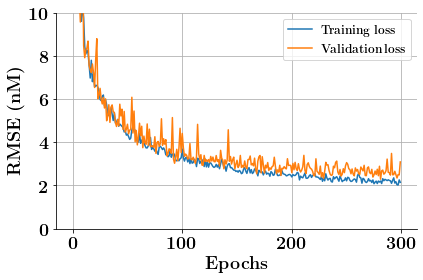

In [36]:
#Figures for paper
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 
matplotlib.rc('font', weight='bold')
plt.figure()
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot(history.history['loss'], label='$\mathrm{Training\ loss}$')
plt.plot(history.history['val_loss'], label='$\mathrm{Validation\ loss}$')
plt.ylim([0, 10])
plt.xlabel('$\mathrm{Epochs}$', fontsize=18)
plt.ylabel('$\mathrm{RMSE\ (nM)}$', fontsize=18)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('supplementary_fig.pdf', transparent=True)



RMSE: 
4.3543519234106345


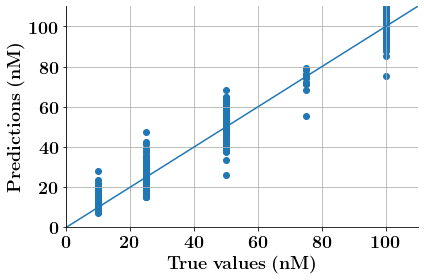

In [37]:
plt.figure()
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
test_predictions = dnn_fscav.predict(inputs[test]).flatten()
plt.scatter(targets[test], test_predictions, alpha=1)
plt.xlabel('$\mathrm{True\ values\ (nM)}$', fontsize=18)
plt.ylabel('$\mathrm{Predictions\ (nM)}$', fontsize=18)
lims = [0, 110]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
print('RMSE: ')
print(math.sqrt(tf.keras.losses.MSE(test_predictions, targets[test])))
plt.grid(True)
plt.tight_layout()
plt.savefig('supplementary_fig2.pdf', transparent=True)

Sigmoid: 

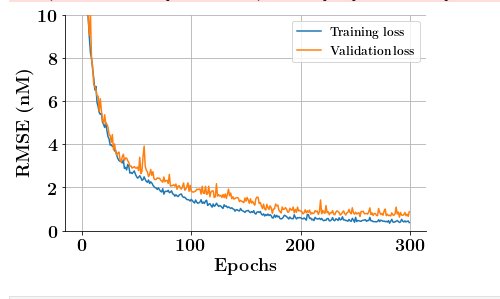
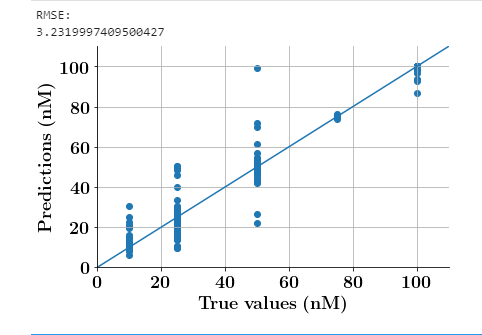

Selu: 

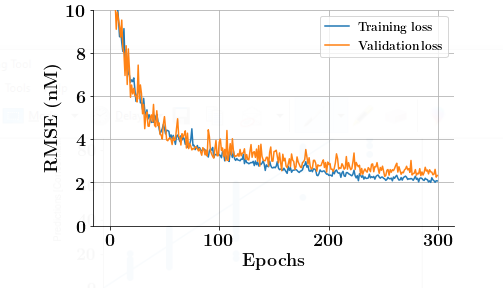
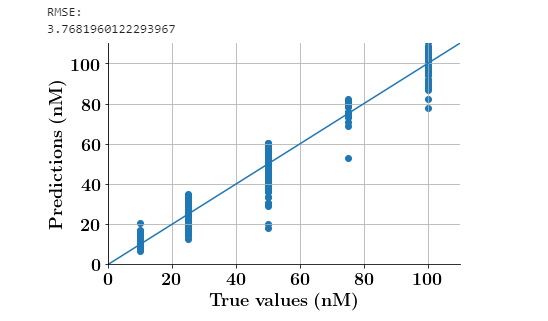

Relu: 

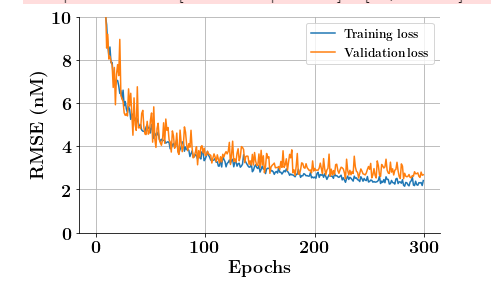
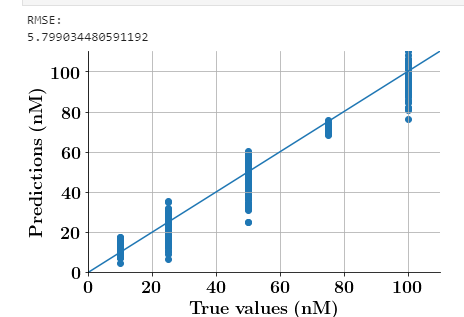

Tanh:

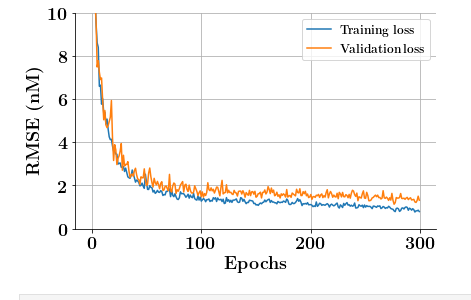
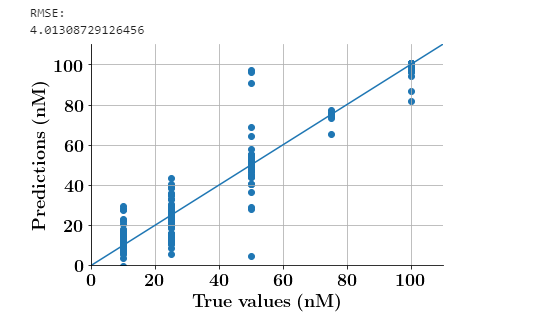

Linear: 

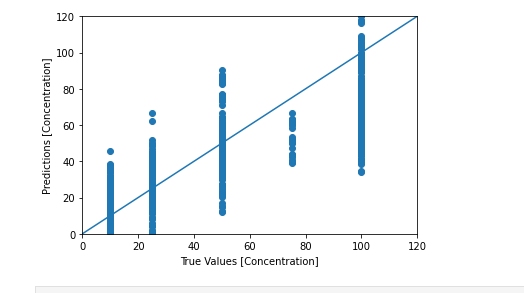

ELU:

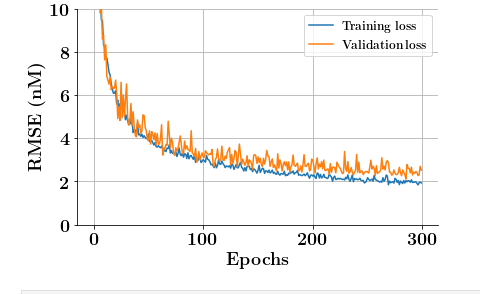
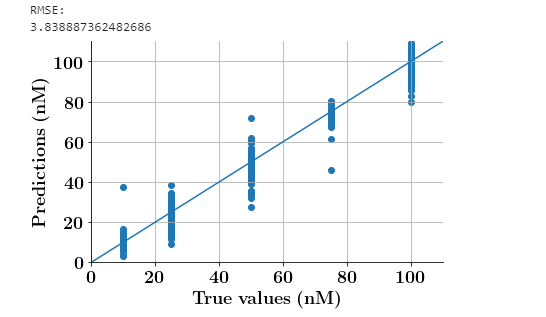

GELU: 

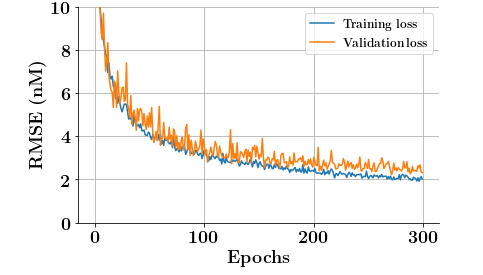
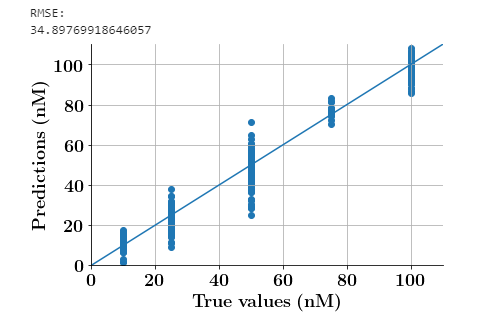

Softmax

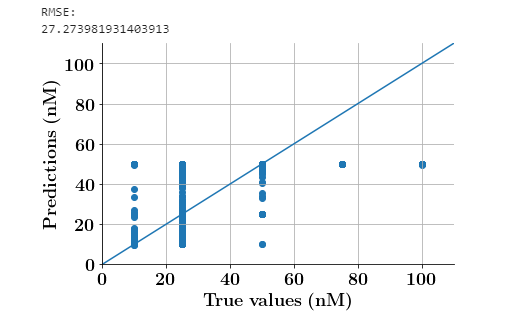

hard sigmoid

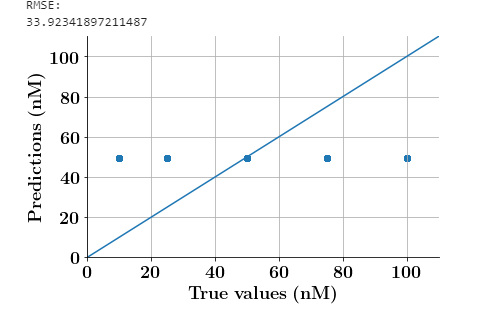

SWISH: 
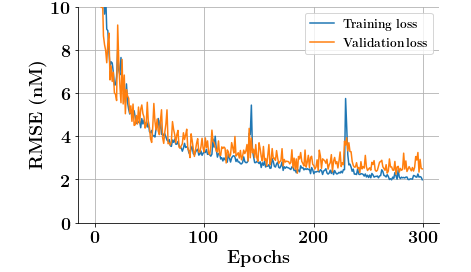
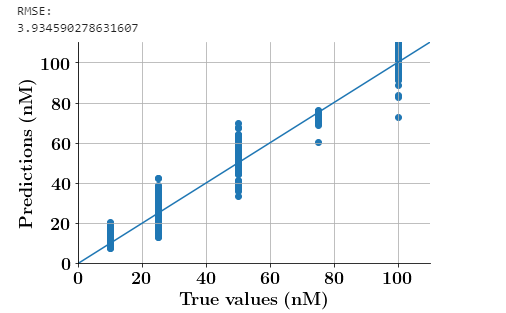

Softplus:

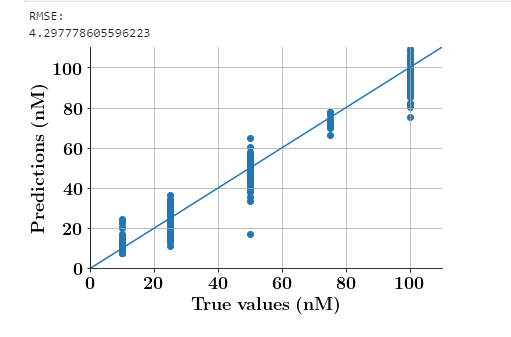
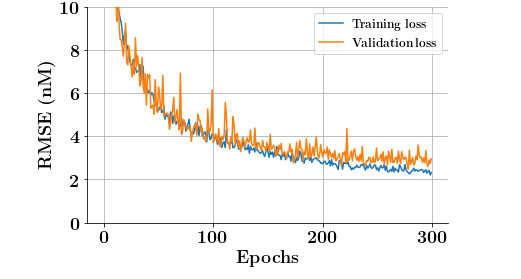

Softsign

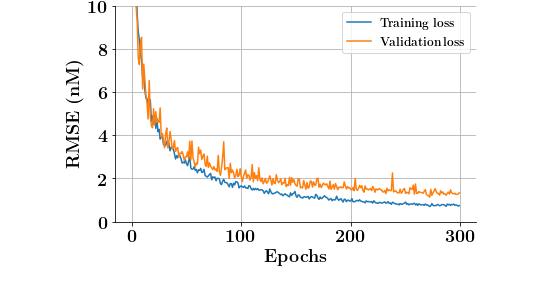
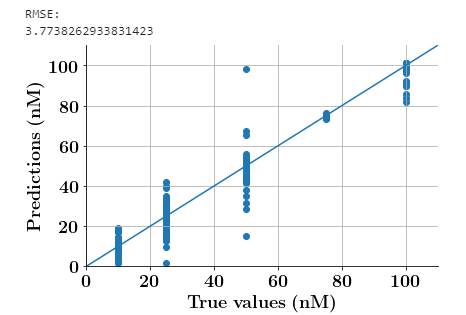

#Number of epochs: 

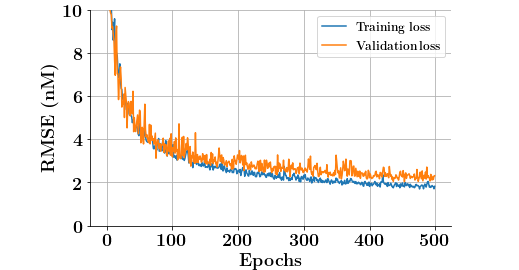
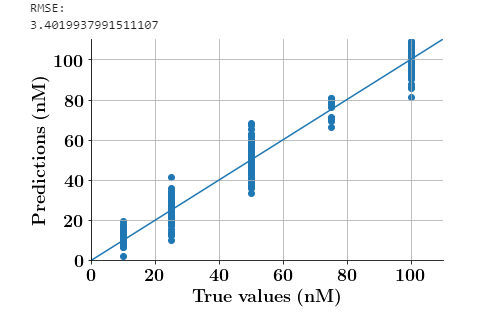


#Size of the neural network. 550x550


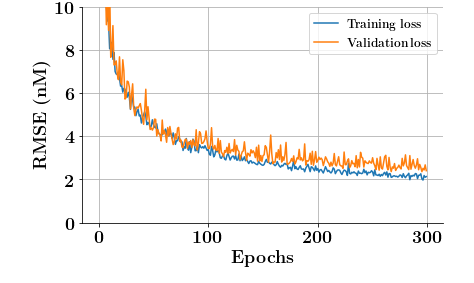
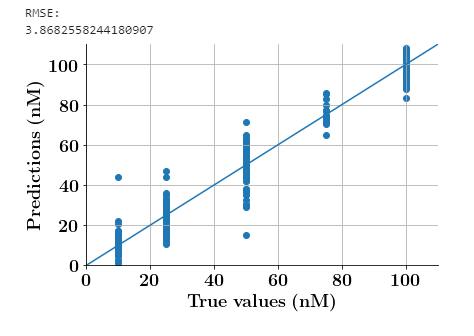

#Size of the neural network. 1100x225

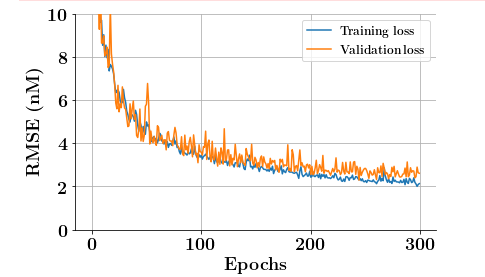
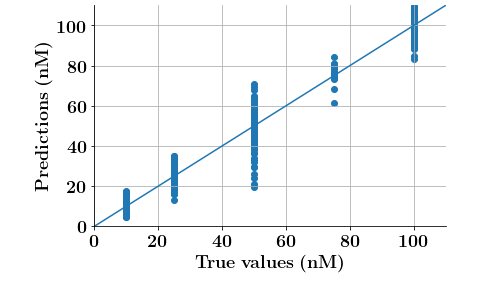

size of neural network: 11400x750

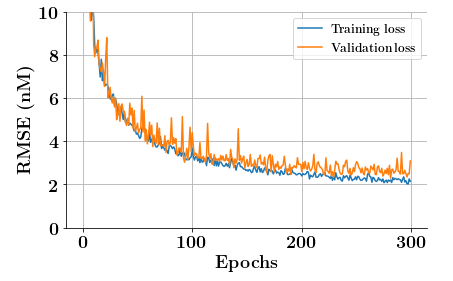
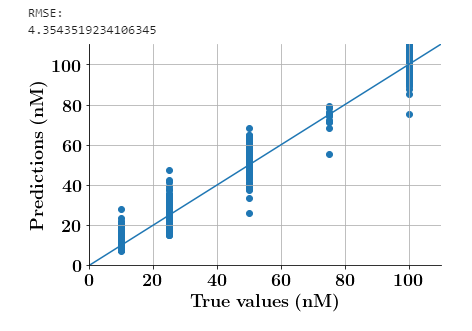